<a href="https://colab.research.google.com/github/YounSooKimTech/Greg_Python/blob/main/interaction_example_with_dog's_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np

np.random.seed(123)

dog1_height = np.random.randint(6, 9, 10)
dog1_weight = np.random.randint(2, 6, 10)

dog_ch = pd.DataFrame({"height":dog1_height, "weight":dog1_weight})
dog_ch["kind"] = "chihuahua"

dog2_height = np.random.randint(21, 24, 10)
dog2_weight = np.random.randint(45, 60, 10)
dog_husky= pd.DataFrame({"height":dog2_height, "weight":dog2_weight})
dog_husky["kind"] = "husky"

dogs = dog_ch.append(dog_husky)

dogs

,height,weight,kind
0,8,4,chihuahua
1,7,3,chihuahua
2,8,2,chihuahua
3,8,3,chihuahua
4,6,4,chihuahua
5,8,5,chihuahua
6,8,3,chihuahua
7,7,2,chihuahua
8,8,4,chihuahua
9,7,2,chihuahua


In [25]:
# dummy codding

dogs["D_kind"] = dogs["kind"].map({"husky":1, "chihuahua":0})
dogs.head()

,height,weight,kind,D_kind
0,8,4,chihuahua,0
1,7,3,chihuahua,0
2,8,2,chihuahua,0
3,8,3,chihuahua,0
4,6,4,chihuahua,0


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     527.1
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           8.79e-15
Time:                        21:47:10   Log-Likelihood:                -58.105
No. Observations:                  20   AIC:                             120.2
Df Residuals:                      18   BIC:                             122.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.5861      2.373     -9.098      0.0

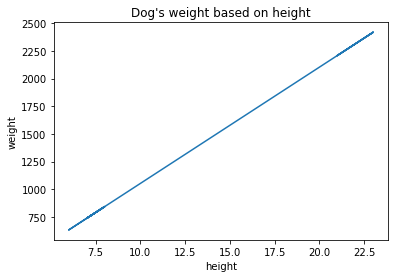

In [42]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

model0 = smf.ols(formula = "weight~height", data=dogs).fit()
print(model0.summary())

plt.plot(dogs["height"], model1.params[0]+model1.params[1]*dogs["height"])

plt.title("Dog's weight based on height")
plt.xlabel("height")
plt.ylabel("weight")

plt.show()

In [26]:
# regression without interaction

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = "weight~height+C(D_kind)", data=dogs).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     652.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           8.51e-17
Time:                        18:35:05   Log-Likelihood:                -48.678
No. Observations:                  20   AIC:                             103.4
Df Residuals:                      17   BIC:                             106.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.4594      6.959      1.

In [27]:
print(model.params)

Intercept         13.459434
C(D_kind)[T.1]    67.724528
height            -1.367925
dtype: float64


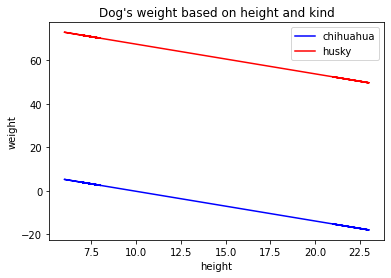

In [44]:
import matplotlib.pyplot as plt

plt.plot(dogs["height"], model.params[0]+model.params[1]*0 + model.params[2]*dogs["height"], label="chihuahua", c="b")
plt.plot(dogs["height"], model.params[0]+model.params[1]*1 + model.params[2]*dogs["height"], label="husky", c="r")
plt.legend()
plt.title("Dog's weight based on height and kind")
plt.xlabel("height")
plt.ylabel("weight")

plt.show()


In [29]:
# regression model with interaction

import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols(formula = "weight~height+C(D_kind) + height*C(D_kind)", data=dogs).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     471.1
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           8.19e-16
Time:                        18:35:33   Log-Likelihood:                -47.287
No. Observations:                  20   AIC:                             102.6
Df Residuals:                      16   BIC:                             106.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.53

In [37]:
print(model1.params)


Intercept                  1.533333
C(D_kind)[T.1]           105.106011
height                     0.222222
height:C(D_kind)[T.1]     -2.763206
dtype: float64


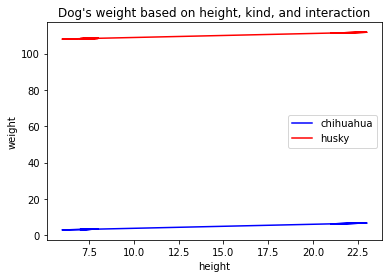

In [45]:
import matplotlib.pyplot as plt

plt.plot(dogs["height"], model1.params[0]+model1.params[1]*0 + model1.params[2]*dogs["height"] + model1.params[3]*0*dogs["height"], label="chihuahua", c="b")
plt.plot(dogs["height"], model1.params[0]+model1.params[1]*1 + model1.params[2]*dogs["height"] + model1.params[3]*0*dogs["height"], label="husky", c="r")

plt.legend()

plt.title("Dog's weight based on height, kind, and interaction")
plt.xlabel("height")
plt.ylabel("weight")

plt.show()